In [ ]:
# Package setup
import os
import glob
import logging
import scanpy as sc
import torch
import pytorch_lightning as pl

# Import expert functions
from src.utils.constants import TRAINING_KEYS
from src.models._jedvi import JEDVI
from src.plotting import get_model_results, get_latest_tensor_dir
# Import model run functions
from src.tune.run import train, test, full_run

# Setup logger
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
# Change to source directory
os.chdir('../')

/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `

### I/O

In [ ]:
# Set training and testing data directory
work_dir = '/home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069'                 # Replace with path to your data directory
train_dir = os.path.join(work_dir, 'train')
test_dir = os.path.join(work_dir, 'test')
# Set model output directory
model_dir = os.path.join(work_dir, 'models', 'small')
os.makedirs(model_dir, exist_ok=True)
# Set training path
train_p = os.path.join(train_dir, 'shared_model_set_100.h5ad')                      # Select a training adata
# Set testing path
test_p = os.path.join(test_dir, 'jurkat.h5ad')                                      # Select a testing adata

### Train single config

In [ ]:
# Train model
config_p = '../resources/params/config.yaml'
_results = full_run(
    config_p=config_p,              # Path to the .yaml training config
    train_p=train_p,                # Path to the .h5ad training adata
    test_p=test_p,                  # Path to the .h5ad testing adata
    model_dir=model_dir,            # Model output directory
    test_unseen=False               # Whether to test zero-shot test classification on perturbations
)

### Train multiple configs

In [ ]:
# I/O
train_p = '/home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/train/shared_model_set_100_w_ctrl.h5ad'
test_p = '/home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/test/jurkat.h5ad'
# Set output directory for training
model_dir = os.path.join(work_dir, 'models', 'top100')
os.makedirs(model_dir, exist_ok=True)

# Run configs
config_dir = '../resources/params/runs/test/'
config_ps = glob.glob(f'{config_dir}/**/*.yaml', recursive=True)
config_ps

['../resources/params/runs/test/1.yaml',
 '../resources/params/runs/test/2.yaml']

In [8]:
# Train configs
for config_p in config_ps:
    run_name = os.path.basename(os.path.dirname(config_p))
    run_dir = os.path.join(model_dir, run_name)
    full_run(config_p=config_p, train_p=train_p, test_p=test_p, model_dir=run_dir, test_unseen=True)

2025-10-16 01:41:59,632 - INFO - Loading config file: ../resources/params/runs/test/1.yaml
2025-10-16 01:41:59,640 - INFO - Run output directory: /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/models/top100/test/1
2025-10-16 01:41:59,642 - INFO - Reading training data from: /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/train/shared_model_set_100_w_ctrl.h5ad
2025-10-16 01:42:02,670 - INFO - Using perturbation direction to classify
2025-10-16 01:42:02,670 - INFO - Setting up model.
2025-10-16 01:42:02,671 - INFO - Adding class embedding from adata.uns[cls_embedding] to model
2025-10-16 01:42:02,676 - INFO - Adding empty control class embedding, will be learned by model.
2025-10-16 01:42:02,686 - INFO - Calculating class similarities
2025-10-16 01:42:03,868 - INFO - Running at: /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/models/top100/test/1
2025-10-16 01:42:03,868 - INFO - Epochs suggested: 66, training for 400 epochs.
2025-10-16 01:42:03,873 - INFO - Saving m

<class 'src.models._jedvi.JEDVI'> Model with the following params: 
n_classes: 101, n_unseen_classes: 302, use_gene_emb: False
ctrl_class: neg;control, use_full_cls_emb: False
Training status: Not Trained

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:363: Skipping 'train_params' parameter because it is not possible to safely dump to YAML.
SLURM auto-requeueing enabled. Setting signal handlers.
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.
2025-10-16 02:36:02,979 - INFO - Processing train set
2025-10-16 02:36:05,333 - INFO - Using class embedding: torch.Size([101, 3072])
2025-10-16 02:36:11,683 - INFO - Using class embedding: torch.Size([101, 3072])
2025-10-16 02:36:14,646 - INFO - Calculating latent neighbors
2025-10-16 02:36:44,684 - INFO - Calculating latent umap
2025-10-16 02:37:52,232 - INFO - Plotting train for label: perturbation_direction
... storing 'cls_prediction' as categorical
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
2025-10-16 02:37:54,890 - INFO - Plotting train for label: perturbation
2025-10-16 02:37:58,843 - INFO - Plotting train for label: dataset
  0%|          | 0/10 [00:00<?, ?it/s]/home/xlv0877/.conda/envs/pyd

ValueError: All arrays must be of the same length

#### Manual model testing

In [7]:
# Manual model testing

# Load best model
_model_dir = '/home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/models/top100/test/test/lightning_logs/version_18'
model = JEDVI.load_checkpoint(
    _model_dir,
    adata=sc.read(train_p)
)
# Manually test model with control neighbor filtering
results = test(
    model, 
    test_adata_p=test_p, 
    output_dir=_model_dir, 
    incl_unseen=False, 
    plot=True, 
    return_results=False, 
    min_ms=0.0,
    control_neighbor_threshold=0.1
)

2025-10-14 22:07:45,823 - INFO - Loading model checkpoint /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/models/top100/test/test/lightning_logs/version_18/checkpoints/epoch=368-step=18628-f1_score_validation=0.42429453134536743/model.pt.


INFO     File                                                                                                      
         /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/models/top100/test/test/lightning_logs/version_18/c
         heckpoints/epoch=368-step=18628-f1_score_validation=0.42429453134536743/model.pt already downloaded       


2025-10-14 22:07:46,314 - INFO - Adding class embedding from adata.uns[cls_embedding] to model
2025-10-14 22:07:46,543 - INFO - Calculating class similarities
2025-10-14 22:07:48,745 - INFO - Testing model with: /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/test/jurkat.h5ad
2025-10-14 22:07:53,118 - INFO - Filtering test data for min class neighbor proportion of 0.1.
2025-10-14 22:07:53,118 - INFO - Normalizing adata.
2025-10-14 22:07:55,324 - INFO - Log1p transforming adata.
2025-10-14 22:07:55,995 - INFO - Calculating PCA.
2025-10-14 22:10:10,237 - INFO - Calculating neighbors.
2025-10-14 22:10:23,093 - INFO - Keeping 21448 / 131286 cells (16.3%)
2025-10-14 22:10:23,117 - INFO - Found 243 trained class embeddings in model.
2025-10-14 22:10:23,117 - INFO - Found 18611 total class embeddings in model.
2025-10-14 22:10:23,117 - INFO - Found 937 test perturbation(s).
2025-10-14 22:10:23,118 - INFO - Found 192 shared perturbations between training and testing.
2025-10-14 22:10:23

### Custom training

In [5]:
def get_ouptut_dir(config_p: str, output_base_dir: str | None = None) -> str:
    # Create directory based on the input config name
    if output_base_dir is None:
        output_dir = os.path.dirname(config_p)
    else:
        output_dir = os.path.join(output_base_dir, os.path.basename(config_p).replace('.yaml', ''))
    logging.info(f'Run output directory: {output_dir}')
    os.makedirs(output_dir, exist_ok=True)
    return output_dir

In [20]:
from src.tune.run import read_config
from src.tune._statics import CONF_KEYS, NESTED_CONF_KEYS

In [76]:
# params
config_p = '../resources/params/runs/test/test.yaml'
step_model_dir = get_ouptut_dir(config_p, output_base_dir=model_dir)
pre_train_model_dir = os.path.join(step_model_dir, 'pretrain')
cls_label = 'cls_label'
batch_key = 'dataset'
verbose = True
torch.set_float32_matmul_precision('medium')

2025-10-08 15:01:35,706 - INFO - Run output directory: /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/models/top100/test


In [39]:
logging.info(f'Reading training data from: {ctrl_p}')
model_set = sc.read(ctrl_p)
# Check if dataset is compatible
assert cls_label in model_set.obs.columns and batch_key in model_set.obs.columns

2025-10-08 13:22:47,985 - INFO - Reading training data from: /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/train/ctrl.h5ad


In [40]:
# Define all labels to classify on
if 'perturbation_direction' in model_set.obs.columns:
    logging.info('Using perturbation direction to classify')
    cls_labels = ['perturbation_direction', 'perturbation']
else:
    cls_labels = ['celltype', 'perturbation_type', 'perturbation']
if verbose:
    # Check number of unique perturbations to classify
    logging.info(f'Initializing dataset with {model_set.obs.cls_label.nunique()} classes')
    logging.info(f'{model_set.obs[cls_labels[1:]].drop_duplicates().shape[0]} unique perturbations')
    logging.info(f'{model_set.obs[cls_labels[-1]].nunique()} unique gene-perturbations')
    logging.info(f'{model_set.obs["celltype"].nunique()} unique cell types')
    logging.info(f'{model_set.obs["dataset"].nunique()} datasets')
    logging.info(f'Mean number of cells / perturbation {model_set.obs.cls_label.value_counts().mean()}')
    logging.info(f'Class embedding shape: {model_set.uns["cls_embedding"].shape}')
    logging.info(f'Adata shape: {model_set.shape}')

2025-10-08 13:23:00,057 - INFO - Using perturbation direction to classify
2025-10-08 13:23:00,058 - INFO - Initializing dataset with 1 classes
2025-10-08 13:23:00,059 - INFO - 1 unique perturbations
2025-10-08 13:23:00,060 - INFO - 1 unique gene-perturbations
2025-10-08 13:23:00,060 - INFO - 3 unique cell types
2025-10-08 13:23:00,061 - INFO - 6 datasets
2025-10-08 13:23:00,061 - INFO - Mean number of cells / perturbation 51810.0
2025-10-08 13:23:00,061 - INFO - Class embedding shape: (18611, 3072)
2025-10-08 13:23:00,062 - INFO - Adata shape: (51810, 5764)


In [70]:
# Read training config
config = read_config(config_p)
# Add schedule params to plan
config[CONF_KEYS.PLAN][NESTED_CONF_KEYS.SCHEDULES_KEY] = config[CONF_KEYS.SCHEDULES]
# Add plan to train
config[CONF_KEYS.TRAIN][NESTED_CONF_KEYS.PLAN_KEY] = config[CONF_KEYS.PLAN]
# Add encoder and decoder args to model
config[CONF_KEYS.MODEL][NESTED_CONF_KEYS.ENCODER_KEY] = config[CONF_KEYS.ENCODER]
config[CONF_KEYS.MODEL][NESTED_CONF_KEYS.DECODER_KEY] = config[CONF_KEYS.DECODER]
# Add classifier args to model
config[CONF_KEYS.MODEL][NESTED_CONF_KEYS.CLS_KEY] = config[CONF_KEYS.CLS]

2025-10-08 14:55:34,886 - INFO - Loading config file: ../resources/params/runs/test/test.yaml


In [71]:
from copy import deepcopy
# Build pre-training config from finetune config
pre_train_epochs = 500
pre_train_keys = ['rl_weight']
# Set all schedules to 0 that are not reconstruction related
set_to_default_keys = [k for k in config[CONF_KEYS.SCHEDULES].keys() if k not in pre_train_keys]
pre_train_config = deepcopy(config)
for k, params in pre_train_config[CONF_KEYS.SCHEDULES].items():
    if k in set_to_default_keys:
        params['min_weight'] = 0
        params['max_weight'] = 0
    else:
        params['min_weight'] = 1
        params['max_weight'] = 1
# Set max epochs and max warmup epochs for kl loss
pre_train_config[CONF_KEYS.TRAIN]['max_epochs'] = pre_train_epochs
pre_train_config[CONF_KEYS.TRAIN][NESTED_CONF_KEYS.PLAN_KEY]['n_epochs_warmup'] = pre_train_epochs
# Set kl weight to 0-1
pre_train_config[CONF_KEYS.TRAIN][NESTED_CONF_KEYS.PLAN_KEY]['min_kl_weight'] = 0
pre_train_config[CONF_KEYS.TRAIN][NESTED_CONF_KEYS.PLAN_KEY]['max_kl_weight'] = 1
# Disable contrastive loader (needs class labels)
pre_train_config[CONF_KEYS.DATA]['use_contrastive_loader'] = None
pre_train_config[CONF_KEYS.DATA]['batch_size'] = int(pre_train_config[CONF_KEYS.DATA]['max_cells_per_batch'] * pre_train_config[CONF_KEYS.DATA]['max_classes_per_batch'])

In [47]:
%autoreload 2

In [57]:
# Setup model
logging.info('Setting up pre-train model.')
# Setup anndata with model
JEDVI.setup_anndata(
    model_set,
    batch_key=batch_key,
    class_emb_uns_key=None
)
pre_train_model = JEDVI(model_set, **pre_train_config[CONF_KEYS.MODEL].copy())

2025-10-08 13:33:22,392 - INFO - Setting up pre-train model.
2025-10-08 13:33:22,395 - INFO - No class embedding found in adata, falling back to internal embeddings with dimension 128. You can change this by specifying `n_dims_emb`.


In [58]:
# Set training logger
pre_train_config[CONF_KEYS.TRAIN]['logger'] = pl.loggers.TensorBoardLogger(pre_train_model_dir)
# Train the model
logging.info(f'Running at: {step_model_dir}')
pre_train_model.train(
    data_params=pre_train_config[CONF_KEYS.DATA].copy(), 
    model_params=pre_train_config[CONF_KEYS.MODEL].copy(), 
    train_params=pre_train_config[CONF_KEYS.TRAIN].copy(), 
    return_runner=False
)

2025-10-08 13:33:26,394 - INFO - Running at: /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/models/top100/test
2025-10-08 13:33:26,394 - INFO - Epochs suggested: 154, training for 500 epochs.
2025-10-08 13:33:26,397 - WARNING - No external class embeddings provided, falling back to internal class embeddings.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


<class 'src.models._jedvi.JEDVI'> Model with the following params: 
n_classes: 1, n_unseen_classes: None, use_gene_emb: False , use_full_cls_emb: False
Training status: Not Trained

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Training:   0%|          | 0/500 [00:00<?, ?it/s]

/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/result.py:213: You called `self.log('kl_weight', ...)` in your `training_step` but the value needs to be floating to be reduced. Converting it to torch.float32. You can silence this warning by converting the value to floating point yourself. If you don't intend to reduce the value (for instance when logging the global step or epoch) then you can use `self.logger.log_metrics({'kl_weight': ...})` instead.
`Trainer.fit` stopped: `max_epochs=500` reached.
2025-10-08 13:44:11,262 - INFO - Processing train set


KeyError: None

In [81]:
model_set.obsm['z'] = pre_train_model.get_latent_representation()

2025-10-08 15:54:08,601 - INFO - Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup


In [82]:
sc.pp.neighbors(model_set, use_rep='z')

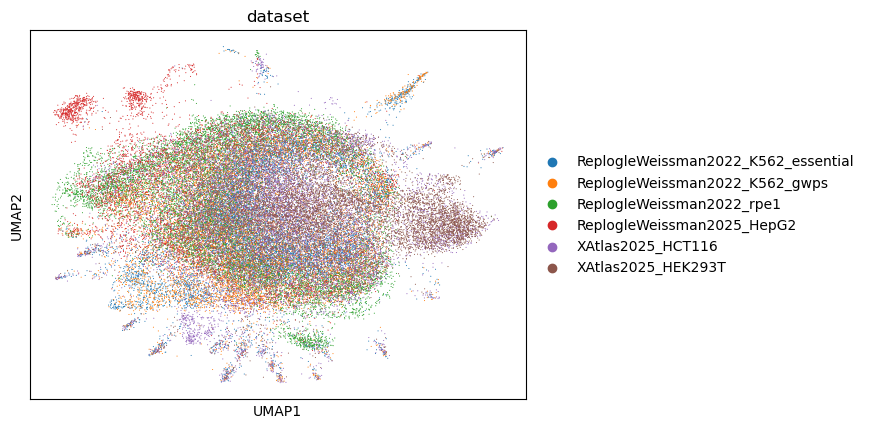

In [83]:
sc.tl.umap(model_set)
sc.pl.umap(model_set, color='dataset')

In [84]:
model_set.obs.perturbation.value_counts()

perturbation
control    51810
Name: count, dtype: int64

In [61]:
# Load training data
train_adata = sc.read(train_p)

In [66]:
# Init perturbation model with pre-trained control model
model = JEDVI.from_base_model(pre_train_model, labels_key=cls_label, adata=train_adata, **config[CONF_KEYS.MODEL].copy())

2025-10-08 14:51:18,610 - INFO - Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup
2025-10-08 14:51:18,627 - INFO - Adding class embedding from adata.uns[cls_embedding] to model
2025-10-08 14:51:18,635 - INFO - Calculating class similarities


In [78]:
# Read training config
config = read_config(config_p)
# Add schedule params to plan
config[CONF_KEYS.PLAN][NESTED_CONF_KEYS.SCHEDULES_KEY] = config[CONF_KEYS.SCHEDULES]
# Add plan to train
config[CONF_KEYS.TRAIN][NESTED_CONF_KEYS.PLAN_KEY] = config[CONF_KEYS.PLAN]
# Add encoder and decoder args to model
config[CONF_KEYS.MODEL][NESTED_CONF_KEYS.ENCODER_KEY] = config[CONF_KEYS.ENCODER]
config[CONF_KEYS.MODEL][NESTED_CONF_KEYS.DECODER_KEY] = config[CONF_KEYS.DECODER]
# Add classifier args to model
config[CONF_KEYS.MODEL][NESTED_CONF_KEYS.CLS_KEY] = config[CONF_KEYS.CLS]
# Set training logger
config[CONF_KEYS.TRAIN]['logger'] = pl.loggers.TensorBoardLogger(step_model_dir)
# Train the model
logging.info(f'Running at: {step_model_dir}')
model.train(
    data_params=deepcopy(config[CONF_KEYS.DATA]), 
    model_params=deepcopy(config[CONF_KEYS.MODEL]), 
    train_params=deepcopy(config[CONF_KEYS.TRAIN]), 
    return_runner=False
)
# Save results to lightning directory
results, latent = get_model_results(
    model=model, 
    cls_labels=cls_labels, 
    log_dir=step_model_dir, 
    plot=True, 
    max_classes=100
)

2025-10-08 15:04:29,896 - INFO - Loading config file: ../resources/params/runs/test/test.yaml
2025-10-08 15:04:29,944 - INFO - Running at: /home/xlv0877/proj_home/dl/data/merge/8a2a33dfa4d9a069/models/top100/test
2025-10-08 15:04:29,944 - INFO - Epochs suggested: 117, training for 1000 epochs.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


<class 'src.models._jedvi.JEDVI'> Model with the following params: 
n_classes: 100, n_unseen_classes: 302, use_gene_emb: False , use_full_cls_emb: False, use_full_cls_emb: False, 
use_full_cls_emb: False
Training status: Not Trained

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1000` reached.
2025-10-08 15:31:58,231 - INFO - Processing train set
2025-10-08 15:31:59,594 - INFO - Using class embedding: torch.Size([100, 3072])
2025-10-08 15:32:03,109 - INFO - Using class embedding: torch.Size([100, 3072])
2025-10-08 15:32:04,726 - INFO - Calculating latent neighbors
2025-10-08 15:32:22,087 - INFO - Calculating latent umap
2025-10-08 15:32:58,416 - INFO - Plotting train for label: perturbation_direction
... storing 'cls_prediction' as categorical
/home/xlv0877/.conda/envs/pydl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
2025-10-08 15:33:00,032 - INFO - Plotting train for label: perturbation
2025-10-08 15:33:03,287 - INFO - Plotting train for label: dataset
100%|██████████| 10/10 [00:00<00:00, 33.63it/s]
2025-10-08 15:33:0

In [80]:
# Test model
version_dir = get_latest_tensor_dir(step_model_dir)
top_n_predictions, _ = test(
    model=model,
    test_adata_p=test_p,
    output_dir=version_dir,
    incl_unseen=False,
    plot=True,
    return_results=True
)

2025-10-08 15:49:29,937 - INFO - Found 100 trained class embeddings in model.
2025-10-08 15:49:29,937 - INFO - Found 402 total class embeddings in model.
2025-10-08 15:49:29,938 - INFO - Found 1139 test perturbations.
2025-10-08 15:49:29,938 - INFO - Found 93 shared perturbations between training and testing.
2025-10-08 15:49:29,938 - INFO - Found 1046 unseen perturbations between training and testing.
2025-10-08 15:49:29,938 - INFO - Found 349 perturbations in model's class embedding.
2025-10-08 15:49:30,153 - INFO - Subsetting to training perturbations only, got 93
2025-10-08 15:49:30,181 - INFO - Added jurkat as dataset key.
2025-10-08 15:49:30,282 - INFO - Filtered for minimum mixscale score of 4.0, got 5785 cells.
2025-10-08 15:49:30,380 - INFO - Found 83 perturbations with at least 10 cells.
2025-10-08 15:49:30,381 - INFO - Using model's gene embeddings for inference.
2025-10-08 15:49:30,382 - INFO - Adding class embedding from adata.uns[cls_embedding] to model
2025-10-08 15:49:3